# Simulating a random process

<div class="alert alert-block alert-success">
<b> This page (and subsequent pages) is a Jupyter Notebook. Download it or open it in Colab so you can actually run the code blocks!</b> 
    
Remember, there's no way you can actually "break" anything, so don't be afraid to edit things within this notebook. Errors are not necessarily a bad thing (even if they do look scary), have a go at working through some of the examples below. Today is not about understanding all of the specifics or the exact code you will be confronted with, but rather its important to try things out before the course starts so we can be sure you have a working set up for next week
</div>


One of the powerful things about coding is that we can use the computer to **simulate random events**. This means we can model things like rolling dice, flipping coins, or drawing cards. These (and other) examples all represent processes where the outcome is uncertain but they follow known probabilities.

**Why is this useful?**

Our interest in statistics is often in whether the measurements we observe reflect a real effect or are simply *the result of chance*. To answer this, we study how random variability influences data and what tends to happen on average when chance is involved.

For example, imagine someone taking a multiple-choice style IQ test. Their score reflects their true ability, but also some element of random chance. They might have guessed on questions they didn’t know, and depending on luck, some of those guesses could be correct. As we’ll see in this course, randomness has predictable properties: its influence tends to average out when we look across many measurements. You might get lucky and guess 3 out of 3 questions correctly, but it’s extremely unlikely to guess 100 out of 100.

By running simulations quickly, the computer allows us to explore these patterns of randomness in ways that would take a *very* long time to test by hand. To understand how randomness shapes our measurements, we can simulate random processes. That’s exactly what we’ll start doing in the next section.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [2]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## Random number

We can ask the computer to generate random numbers, which is the basis of simulating random processes. The `numpy.random()` library is especially useful for this.

For example, the following code block generates a random integer between 0 and 9.
* Run the code block a few times - you should get a different random number in the range [0,10) (ie 0-9 inclusive) each time

In [6]:
np.random.randint(0,10)

9

### Comprehension

**a.Create a for loop to generate multiple random numbers** 
* *The code below is set up to generate `n` random numbers and store them in an array that is length `n`. Uncomment and complete the code block below so that each slot in the variable `MyRandomNumbers` is filled with a new random integer between 1 and 10. If you are stuck look back on the For Loop worksheet*

In [9]:
#n=100 # we will generate n random numbers
#MyRandomNumbers = np.zeros(n) # create the output array

#for i in range(n):
    #YOUR CODE HERE
    
#print(MyRandomNumbers)

# Simulated coin flip

A random number can act as a model for a real world process.

For example, if we flip a fair coin, the chance of getting 'heads' is 0.5 (50%). We can model this using a random integer ins the range  <tt>[0,2]</tt> . This means the computer will always return either <tt>0</tt> or <tt>1</tt> Lets say:

* `0 = Tails`
* `1 = Heads`

Beacause each outcome is equally likely the chance of getting 1 (or heads) is .5, just like flipping a real coin. 


This makes this particular random number generator a simple model of a coin toss: so the probability of gettting 8 heads out of 10 coin flips is the same as the probability of generating 8 ones out of 10 runs of `np.random.randint(0,2)`

* Run the code below a few times - here we are using a `for` loop with an `if` statement to simulate the flipping of a coin 10 times, and producing a readable outcome. The result of random 'coin toss outcomes' should change each time

In [14]:
n=10 # number of coin flips

for i in range(n):
    if np.random.randint(0,2)==1:
        print('HEADS')
    else:
        print('TAILS')


HEADS
TAILS
HEADS
HEADS
HEADS
TAILS
TAILS
HEADS
HEADS
HEADS


### Count the heads

Ultimately we aren't as interested in the entire sequence of coin flips as we are in a *summary* of the results. For example:
* how many times out of the 10 flips did we get a 'heads'? or even further...
* how likely is it that we can get 8/10 'heads' using a fair coin?

To explore this we can store each coin flip as either a 1 or a 0 depending on whether the out come was heads or not. In the end we will print the entire array as well as the sum. If you run your code multiple times you should find that the number of heads varies, although you will more often get values near to 5 (as the coin is fair) than extreme values (such as 9 or 1)

In [37]:
n=10                # number of coin flips
heads = np.empty(n) # create an empty array

for i in range(n):
    if np.random.randint(0,2)==1: 
        heads[i]=1
    else:
        heads[i]=0

print('heads array: ' + str(heads))
print('sum = ' + str(sum(heads)))

heads array: [0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
sum = 3.0


## Double loop

What if we want to go beyond a single simulation of 10 flips. Instead we want to know how often are we getting "average" outcomes (4, 5, or 6 heads out of 10 flips) vs. more extreme outcomes (0, 1, 9, or 10 heads out of 10 flips)

To answer this, we need to repeat our simuluation many time. Each time, we'll flip 10 coins, count the number of heads and record the results. Doing this once gives us a single data point (e.g., "this time we got 7 heads") Doing it 100s or 1000s of times will allow us to see the overall pattern of results. Our goal here will be:

* Each time we simulate 10 coin tosses and count the number of heads. This will be referred to as one *repetition* of the simulation
* Above you created repetitions informally by running the code block multiple times yourself
* Now we'll again try to automate this process by putting a second `for` loop around our existing loop

This **double loop** contains:

* An **inner loop** which simulates the 10 coin tosses
* An **outer loop** repeats the process as many times as you like (e.g., 1000 repetitions)

Overall, the code in your inner loop runs once for every coin flip in a single repetition, and the outer loop controls how many repetitions you do. That means the total number of flips is the number of flips per repetition multiplied by the number of repetitions. For example, if your inner loop flips the coin 10 times and your outer loop runs 5 repetitions, you’ll have flipped a total of 50 coins.

Ultimately, this will let us build up a large set of results that shows us how often “average” outcomes occur compared to extreme ones.



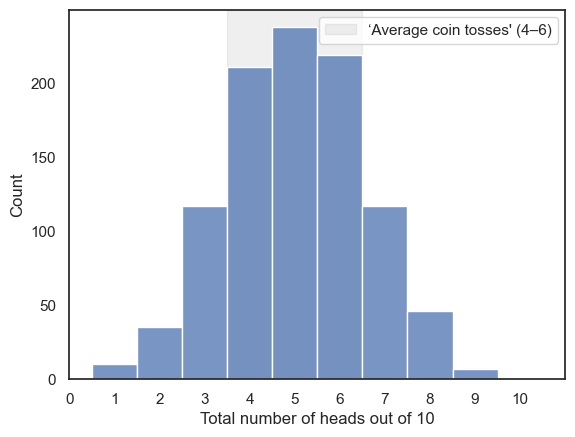

In [20]:
reps = 1000 # how mmany times will we repeat our 10-coin-toss simulation?
nHeads = np.empty(reps) #an empty array to store our results

for j in range(reps):
    n=10
    heads = np.empty(n)

    for i in range(n):
        if np.random.randint(0,2)==0:
            heads[i]=1
        else:
            heads[i]=0
        
    nHeads[j]=sum(heads)
    
# histogram of the number of repetitions in which 0,1,2... etc heads were obtained  
plt.axvspan(3.5, 6.5, alpha=0.12, color = 'gray', label="‘Average coin tosses' (4–6)")
plt.legend()
sns.histplot(nHeads, bins=np.arange(-0.5,10.5,1))
plt.xlim(0,11)
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('Total number of heads out of 10')

plt.show()
    

Indeed, the expected outcomes of 4,5,6 are more likely than the extremes!

### Comprehension questions

**a. In the douple loop we have two counter variables, <tt>i</tt> and <tt>j</tt>...**

* Which counter variable keeps track of our position within the run of 10 coin tosses?
* Which counter variable keeps track of how many *repetitions* of the simulation we ran?

**b. At the end of the simulation, what are the values of <tt>i</tt> and <tt>j</tt>?**
* Think then uncomment the code below and check!

**c. What would you expect if you changed the number of reps to 10? how about 10000?**
* Think then try it above!

In [45]:
# print('i:' + str(i))
# print('j:' + str(j))

**Remember in Python we count from zero (soooo confusing!)**

## Exercise: Galton Board simulation

In the **Galton Board**, small balls are dropped from a funnel onto a board with evenly spaced pins. Each time a ball hits a pin it will **randomly** bounced either to the **left** or to the **right**.

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk1_GaltonBoard.jpg" width=30% />


The ball's final horizontal position depends upon 1) how many pins there are and 2) how many times it has bounced to the left or right. That is:

* To land at the far right, it must bounce **right** at *every* pin it hits
* If it bounces to the **left** and **right** *equally often*, it will land in the centre

When we release a large number of balls  into the Galton Board, we effectvely have a large number of *'repetitions'* of the random bouncing process. This reveals that balanced/fair outcomes (with roughly equal numbers of leftwards and rightward bounces) are most common -- producing a potentially familiar bell shaped pile of balls

Here is a nice YouTube video of the Galton board in action:

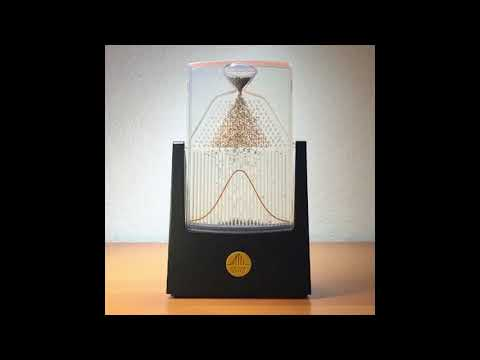

In [21]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('EvHiee7gs9Y')

## Simulate a Single Ball

We’ll start by simulating the path of just one ball as it falls through the Galton board. This will help us understand what’s happening step by step before we move on to many balls.

Let’s imagine our Galton board has **10 rows of pins**. Each time the ball hits a pin, it can bounce either **left** or **right**, and each direction is equally likely. After passing through all 10 rows, the ball will have made 10 random choices. We will keep track of its **horizontal position** after each bounce.

Suppose `x` is an array that stores the horizontal position of the ball. At the start (`x[0]`) the ball is in the center of the board so this will be coded as 0. For each of the 10 pins, we generate a random number to simulate whether the ball went `left` or `right`:

* If the number is 0, the ball bounces right (x increases by 1).
* If the number is 1, the ball bounces left (x decreases by 1).

After each bounce, we record the new position in the array. Finally, we plot the full trajectory of the ball as it moves down through the rows. Each time you run the code, the ball will take a slightly different path — because the left/right choices are random! As a note, we want to make sure the board has 10 pins (not counting the start position!) 

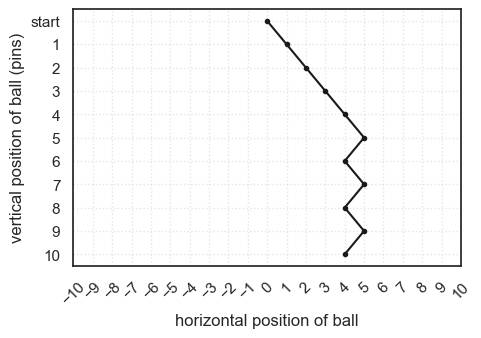

In [54]:
nPins=10
x = np.empty(nPins+1) # we include an extra "slot" for the start position, 0

x[0]=0 # we start at position x=0

for i in range(1,nPins+1): # note the 10 bounces are in positions x[1-10], not x[0-9]
    curPos = x[i-1] # collect the current position of the ball
    
    if np.random.randint(0,2) == 0:
        x[i]=curPos+1 # bounce right - increase x by 1
    else:
        x[i]=curPos-1 # bounce left - decrease x by 1



# plot the trajectory of the ball

y=range(nPins+1, 0, -1) # Set the Y Axis

plt.figure(figsize=(nPins/2, nPins/3))

plt.plot(x, y, 'k.-') # Plot the X, and Y positions
plt.xlim(-nPins,nPins)
plt.xlabel('horizontal position of ball')
plt.ylabel('vertical position of ball (pins)')
plt.xticks(np.arange(-nPins, nPins+1, 1), rotation=45)
plt.grid(True, linestyle=':', alpha=0.5)  # optional: adds light grid lines

y_positions = np.arange(nPins + 1, 0, -1)
y_labels = ['start'] + [str(i) for i in range(1, nPins + 1)]  # replace top tick with "start"
plt.yticks(y_positions, y_labels)

plt.show()

If you run the code block above a few times, you should see the simulated trajectory change each time

### Comprehension Questions

**a. What are we doing with the code `x=np.empty(nPins)`?**

**b. What is the size of <tt>x</tt>**?
* Think then check!

In [55]:
#len(x)

**c. What is the size of y?**
* Think then write your own code to check!

In [56]:
# YOUR CODE HERE

**d. In this simulation, each value in the array <tt>x</tt> records the horizontal position of the ball.**
* What are the possible values in array <tt>x</tt>?
* What were the possible values in the array <tt>heads</tt> in the coin toss simmulation?

**e. Looking at the plot above, what is the value of x[9]?**
* Think then check!


In [57]:
# x[9]

**f. Can you explain what is similar about the the coin toss and Galton Board simulations, and what is different?**
* **answer** - 
    * The Galton board simulation is cumulative (we keep track of hthe total number of leftwardss- and rightwards- bounces so far)
    * This allows us to plot the trajectory
    * The coin toss simulation we record each outcome separately and add them up at the end

However, on a deep level the two simulations are related - 
* Ultimately, the distribution of end points on the Galton board will have the same shape as the distribution of number of heads!

**g. What would you expect if you increas the number of pins above to 20?**

## Double Loop

The point of the Galton Board is to release many balls and see where they are **more likely** to end up. To simulate this, we’ll add an outer loop that repeats our one-ball simulation many times and records each ball’s final horizontal bin (similar to the coin toss).

If you’re feeling adventurous, try completing the outer loop yourself:

* Fill in the sections marked ...
* If you’d rather not, skip ahead to the pre-coded solution

**What your code should do**

* Outer loop: repeat the one-ball simulation nBalls times.
* Inner loop: for each ball, step through the nPins rows (left/right) and track horizontal position.
* Record: after the inner loop finishes, save the ball’s final bin (number of rights, or final x mapped to a bin) into an array.


In [93]:
#reps = 40 # how mmny times will we repeat our single-ball simulation?
#finalPos = ...... # array to store the final horiontal positions

#for j ......
#    nPins=10
#    x = np.empty(nPins+1)

#    x[0]=0 # we start at position x=0

#    for i in range(1,nPins+1):
#        curPos = x[i-1] # collect the current position of the ball

#        if np.random.randint(0,2) == 0:
#            x[i]=curPos+1 # bounce right - increase x by 1
#        else:
#            x[i]=curPos-1 # bounce left - decrease x by 1

#    y=range(nPins+1, 0, -1)

#    # plot the trajectory of the ball
#    plt.plot(x, y, 'k.-', alpha=0.1)
    
#    finalPos[j]=x[nPins]

## Plot the trajectories

# y=range(nPins+1, 0, -1) # Set the Y Axis

# plt.xlim(-nPins,nPins)
# plt.xlabel('horizontal position of ball')
# plt.ylabel('vertical position of ball (pins)')
# plt.xticks(np.arange(-nPins, nPins+1, 1), rotation=45)
# plt.grid(True, linestyle=':', alpha=0.5)  # optional: adds light grid lines

# y_positions = np.arange(nPins + 1, 0, -1)
# y_labels = ['start'] + [str(i) for i in range(1, nPins + 1)]  # replace top tick with "start"
# plt.yticks(y_positions, y_labels)

# plt.show()

    

...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
... scroll down for the ready-made answer:
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>

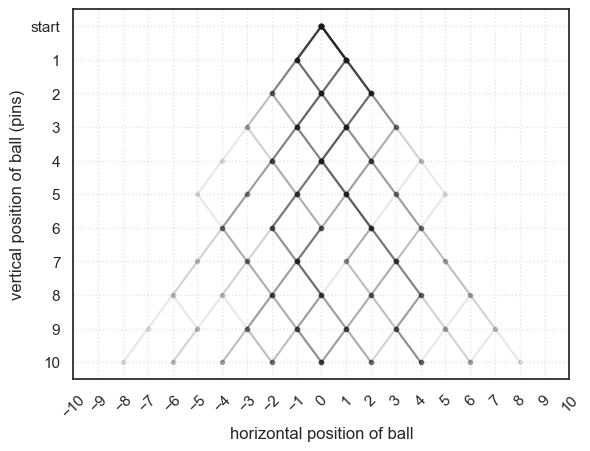

In [79]:
reps = 40 # how mmny times will we repeat our single-ball simulation?
finalPos = np.empty(reps) # array to store the final horiontal positions

for j in range(reps):
    nPins=10
    x = np.empty(nPins+1)

    x[0]=0 # we start at position x=0

    for i in range(1,nPins+1):
        curPos = x[i-1] # collect the current position of the ball
        
        if np.random.randint(0,2) == 0:
            x[i]=curPos+1 # bounce right - increase x by 1
        else:
            x[i]=curPos-1 # bounce left - decrease x by 1

    y=range(nPins+1, 0, -1)

    # plot the trajectory of the ball
    plt.plot(x, y, 'k.-', alpha=0.1)
    
    finalPos[j]=x[nPins]
    
## Plot the trajectories

y=range(nPins+1, 0, -1) # Set the Y Axis

plt.xlim(-nPins,nPins)
plt.xlabel('horizontal position of ball')
plt.ylabel('vertical position of ball (pins)')
plt.xticks(np.arange(-nPins, nPins+1, 1), rotation=45)
plt.grid(True, linestyle=':', alpha=0.5)  # optional: adds light grid lines

y_positions = np.arange(nPins + 1, 0, -1)
y_labels = ['start'] + [str(i) for i in range(1, nPins + 1)]  # replace top tick with "start"
plt.yticks(y_positions, y_labels)

plt.show()



The darker lines on the plot show where multiple balls have passed through the same path — these represent the most common trajectories.

* Run the simulation a few times. You should get a slightly different pattern of paths each time, because every set of random left–right bounces is unique.
* You’ll notice that the balls are most likely to end up near the middle of the board.
* This happens because combinations of mixed left and right bounces are much more common than the extreme cases where the ball bounces in the same direction every time.

After running the simulation, we’ve saved the final horizontal positions of all the balls in the array `finalPos`. We can use this array to create a histogram showing how often each final position occurred:

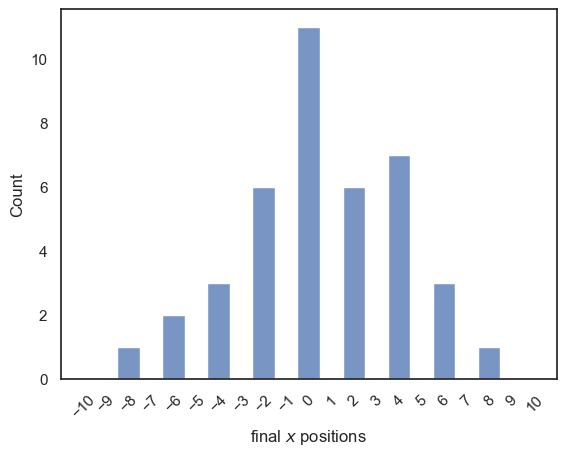

In [80]:
# histogram of the final positions for many balls    
sns.histplot(finalPos, bins=np.arange(-10.5,10.5,1))
plt.xlim(-11,11), plt.xticks(np.arange(-10,11,1), rotation =45)
plt.xlabel('final $x$ positions')
plt.show()
    

## Exercises

* You may like to increase the number of balls in the simulation - you should get a tidier-looking distribution of end points with more balls
* You could try increasing the number of pins. What happens to the histogram of endpoints when you do this?

## Significance of the Galton Board simulation

The Galton Board demonstrates how many small random influences, when combined, tend to produce a predictable overall pattern. Here we saw the familiar bell-shaped curve known as the Normal Distribution.

Each individual bounce of a ball is random and unpredictable, but when we repeat the process many times, the collective result forms an ordered and consistent distribution. This simple simulation captures one of the most important ideas in statistics: that randomness, when aggregated, often produces structure.

We’ll return to this idea later in the course, in the block on Statistical Theory, when we explore why the Normal Distribution appears so frequently in real-world data.